In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [76]:
df1=pd.read_csv('/content/sample_submission.csv')
df2=pd.read_csv('/content/test.csv')
df3=pd.read_csv('/content/train.csv')

In [54]:
df1.head()

,TARGET(PRICE_IN_LACS)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
df2.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [ ]:
df3.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


# Merge df1,df2 and df3

In [77]:
# prompt: Merge df1,df2 and df3

df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)


In [78]:
df.head()

,TARGET(PRICE_IN_LACS),POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,TARGET(PRICE_IN_LACS),POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
166886,45.0,Owner,0.0,0.0,3.0,BHK,2500.000000,1.0,1.0,"Shamshabad Road,Agra",27.140626,78.043277
166887,16.0,Owner,0.0,0.0,2.0,BHK,769.230769,1.0,1.0,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721
166888,27.1,Dealer,0.0,0.0,2.0,BHK,1022.641509,1.0,1.0,"Ajmer Road,Jaipur",26.928785,75.828002
166889,67.0,Owner,0.0,0.0,2.0,BHK,927.079009,1.0,1.0,"Sholinganallur,Chennai",12.900150,80.227910
166890,27.8,Dealer,0.0,1.0,2.0,BHK,896.774194,1.0,1.0,"Jagatpura,Jaipur",26.832353,75.841749


In [7]:
# prompt: alternate method of df.head()

df.sample(5)

,TARGET(PRICE_IN_LACS),POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
14587,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14588,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154268,40.0,Owner,0.0,0.0,2.0,BHK,1099.807534,1.0,1.0,"Kothewada,Nagpur",21.022122,79.007475
37243,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11297,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
df.drop('POSTED_BY',axis=1,inplace=True)
df.sample(5)

,TARGET(PRICE_IN_LACS),UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
125852,NaN,0.0,0.0,3.0,BHK,1478.560867,1.0,1.0,"Kartik Nagar,Bangalore",25.254143,87.051365
102066,NaN,0.0,1.0,3.0,BHK,1401.105316,1.0,1.0,"Manpada,Lalitpur",24.690280,78.418890
1682,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154770,44.8,0.0,0.0,3.0,BHK,1493.333333,1.0,1.0,"Jagatpura,Jaipur",26.832353,75.841749
52738,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df.isnull().sum()

TARGET(PRICE_IN_LACS)    68720
UNDER_CONSTRUCTION       68720
RERA                     68720
BHK_NO.                  68720
BHK_OR_RK                68720
SQUARE_FT                68720
READY_TO_MOVE            68720
RESALE                   68720
ADDRESS                  68720
LONGITUDE                68720
LATITUDE                 68720
dtype: int64

In [81]:
df.describe()

,TARGET(PRICE_IN_LACS),UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
count,98171.000000,98171.000000,98171.000000,98171.000000,9.817100e+04,98171.000000,98171.000000,98171.000000,98171.000000
mean,42.869187,0.177517,0.316947,2.389423,7.874292e+03,0.822483,0.932322,21.291708,76.894881
std,365.693199,0.382107,0.465289,0.868954,1.050427e+06,0.382107,0.251194,6.186898,10.240142
min,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,-38.391261,-121.761248
25%,0.000000,0.000000,0.000000,2.000000,9.000277e+02,1.000000,1.000000,18.452663,73.798100
50%,0.000000,0.000000,0.000000,2.000000,1.175007e+03,1.000000,1.000000,20.904426,77.324966
75%,30.500000,0.000000,1.000000,3.000000,1.550388e+03,1.000000,1.000000,26.893640,77.968485
max,30000.000000,1.000000,1.000000,31.000000,2.545455e+08,1.000000,1.000000,65.183330,175.278040


In [82]:
# prompt: find corr() of all columns with target variable TARGET(PRICE_IN_LACS) using pandas

df.corr()['TARGET(PRICE_IN_LACS)'].sort_values(ascending=False)


TARGET(PRICE_IN_LACS)    1.000000
SQUARE_FT                0.402685
BHK_NO.                  0.112283
RERA                     0.067636
UNDER_CONSTRUCTION       0.055399
LATITUDE                -0.017254
LONGITUDE               -0.031112
READY_TO_MOVE           -0.055399
RESALE                  -0.207378
Name: TARGET(PRICE_IN_LACS), dtype: float64

we have to remove column [LATITUDE,LONGITUDE,READY_TO_MOVE,RESALE becuse of very week corr() with target variable


In [83]:
# prompt: remove LATITUDE,LONGITUDE,READY_TO_MOVE,RESALE  columns

df.drop(['LATITUDE', 'LONGITUDE', 'READY_TO_MOVE', 'RESALE'], axis=1, inplace=True)


Alse Remove following columns because of week relation with target variable BHK_NO.
RERA
UNDER_CONSTRUCTION

In [84]:
df.drop(['BHK_NO.','RERA','UNDER_CONSTRUCTION'], axis=1, inplace=True)

In [85]:
df.sample(5)

,TARGET(PRICE_IN_LACS),BHK_OR_RK,SQUARE_FT,ADDRESS
117710,NaN,BHK,574.547544,"Pokhran-2,Mumbai"
108704,NaN,BHK,1490.038507,"E M Bypass,Kolkata"
69664,NaN,BHK,800.000000,"Bansdroni,Kolkata"
69823,NaN,BHK,1750.266809,"Sector-50 Noida,Noida"
131053,NaN,BHK,924.075924,"Ajmer Road,Jaipur"


In [86]:
# prompt: find corr() of all columns with target variable TARGET(PRICE_IN_LACS) using pandas

df.corr()['TARGET(PRICE_IN_LACS)'].sort_values(ascending=False)

TARGET(PRICE_IN_LACS)    1.000000
SQUARE_FT                0.402685
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166891 entries, 0 to 166890
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TARGET(PRICE_IN_LACS)  98171 non-null  float64
 1   BHK_OR_RK              98171 non-null  object 
 2   SQUARE_FT              98171 non-null  float64
 3   ADDRESS                98171 non-null  object 
dtypes: float64(2), object(2)
memory usage: 5.1+ MB


In [88]:
# prompt: check dublicate value

df.duplicated().sum()


72707

In [89]:
# prompt: drop duplicate

df.drop_duplicates(inplace=True)


In [90]:
# prompt: check dublicate value

df.duplicated().sum()

0

In [15]:
df.sample(5)

,TARGET(PRICE_IN_LACS),UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
109108,NaN,0.0,0.0,2.0,BHK,950.092825,1.0,1.0,"Viman Nagar,Pune",18.56000,73.91000
134908,NaN,0.0,0.0,2.0,BHK,1125.175809,1.0,1.0,"Sahibabad,Ghaziabad",28.67110,77.36830
90677,NaN,0.0,1.0,2.0,BHK,830.097737,1.0,1.0,"Kharadi,Pune",18.54380,73.94380
106500,NaN,0.0,0.0,2.0,BHK,1043.750000,1.0,1.0,"Jagannath Nagar,Bhubaneswar",20.26444,85.82806
92349,NaN,0.0,0.0,3.0,BHK,1600.192988,1.0,1.0,"Wakad,Pune",18.59930,73.76250


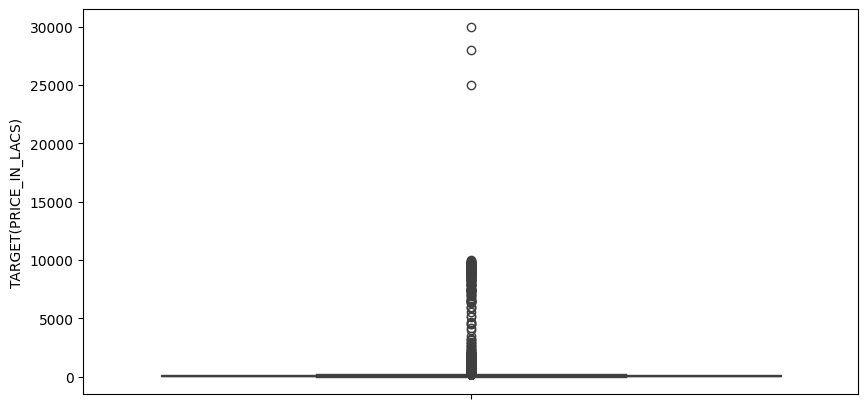

In [91]:
# prompt: check outliers

# Check for outliers using boxplots
sns.boxplot(df['TARGET(PRICE_IN_LACS)'])
plt.show()


In [92]:
# prompt: find IQR

q1 = df['TARGET(PRICE_IN_LACS)'].quantile(0.25)
q3 = df['TARGET(PRICE_IN_LACS)'].quantile(0.75)
iqr = q3 - q1
print(iqr)

62.0


In [93]:
# prompt: remove outliers using IQR

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['TARGET(PRICE_IN_LACS)'] >= lower_bound) & (df['TARGET(PRICE_IN_LACS)'] <= upper_bound)]


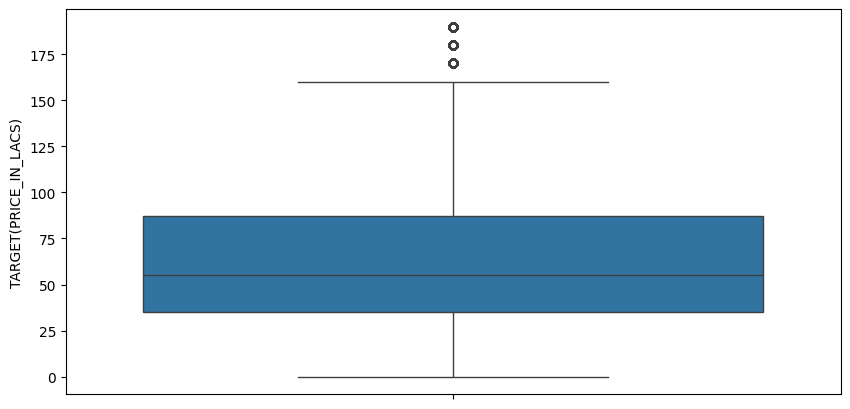

In [94]:
# prompt: check outliers

# Check for outliers using boxplots
sns.boxplot(df['TARGET(PRICE_IN_LACS)'])
plt.show()

In [95]:
# prompt: remove outliers using IQR

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['TARGET(PRICE_IN_LACS)'] >= lower_bound) & (df['TARGET(PRICE_IN_LACS)'] <= upper_bound)]


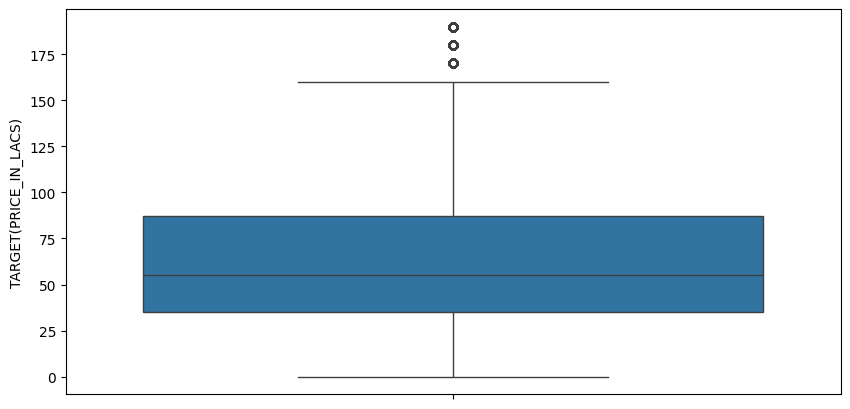

In [96]:
# prompt: check outliers

# Check for outliers using boxplots
sns.boxplot(df['TARGET(PRICE_IN_LACS)'])
plt.show()

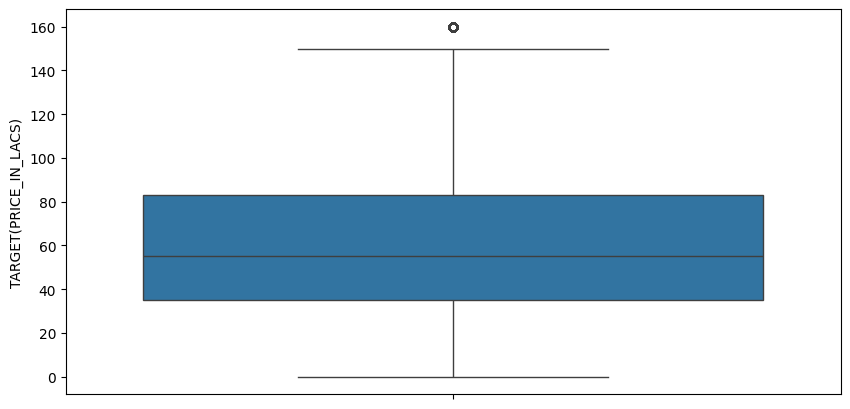

In [97]:
# prompt: remove outliers of column TARGET(PRICE_IN_LACS

import numpy as np

# Calculate the interquartile range (IQR)
q1 = df['TARGET(PRICE_IN_LACS)'].quantile(0.25)
q3 = df['TARGET(PRICE_IN_LACS)'].quantile(0.75)
IQR = q3 - q1

# Define the lower and upper bounds for outlier detection
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df = df[(df['TARGET(PRICE_IN_LACS)'] >= lower_bound) & (df['TARGET(PRICE_IN_LACS)'] <= upper_bound)]

# Check for remaining outliers
sns.boxplot(df['TARGET(PRICE_IN_LACS)'])
plt.show()


In [98]:
# prompt: impute value in TARGET(PRICE_IN_LACS)

# Impute missing values with the median
df['TARGET(PRICE_IN_LACS)'].fillna(df['TARGET(PRICE_IN_LACS)'].median(), inplace=True)

# Check if there are any missing values left
df['TARGET(PRICE_IN_LACS)'].isnull().sum()


0

In [99]:
# prompt: impute value in TARGET(PRICE_IN_LACS)

# Impute missing values with the median
df['SQUARE_FT'].fillna(df['SQUARE_FT'].median(), inplace=True)

# Check if there are any missing values left
df['SQUARE_FT'].isnull().sum()

0

In [100]:
df.describe()

,TARGET(PRICE_IN_LACS),SQUARE_FT
count,25023.000000,2.502300e+04
mean,62.262013,1.487386e+03
std,35.337639,2.845256e+04
min,0.000000,3.000000e+00
25%,35.000000,8.503900e+02
50%,55.000000,1.120079e+03
75%,83.000000,1.434194e+03
max,160.000000,4.300000e+06


In [101]:
df.sample(5)

,TARGET(PRICE_IN_LACS),BHK_OR_RK,SQUARE_FT,ADDRESS
164363,98.0,BHK,1689.655172,"Sector-85 Gurgaon,Gurgaon"
139285,38.0,BHK,762.133975,"Navalur,Chennai"
147682,71.0,BHK,1637.076320,"Whitefield,Bangalore"
158311,42.0,BHK,1200.000000,"GM Palaya,Bangalore"
152720,75.0,BHK,1342.161775,"5th Phase JP Nagar,Bangalore"


In [103]:
df['BHK_OR_RK'] = df['BHK_OR_RK'].map({'BHK': 0, 'RK': 1})

In [104]:
# prompt: corr() of column BHK_OR_RK with target variable TARGET(PRICE_IN_LACS)

df['BHK_OR_RK'].corr(df['TARGET(PRICE_IN_LACS)'])


-0.018613628905794884

# Due to week relation of BHK_OR_RK column with target variale so we drop it

In [105]:
# prompt: drop BHK_OR_RK column

df.drop('BHK_OR_RK', axis=1, inplace=True)


In [106]:
df.head()

,TARGET(PRICE_IN_LACS),SQUARE_FT,ADDRESS
0,0.0,1120.079064,NaN
137440,55.0,1300.236407,"Ksfc Layout,Bangalore"
137441,51.0,1275.000000,"Vishweshwara Nagar,Mysore"
137442,43.0,933.159722,"Jigani,Bangalore"
137443,62.5,929.921143,"Sector-1 Vaishali,Ghaziabad"


In [107]:
# prompt: convert ADDRESS column into numeric using one-hot encoding

df = pd.get_dummies(df, columns=['ADDRESS'], prefix='ADDRESS')


In [108]:
df.sample(5)

,TARGET(PRICE_IN_LACS),SQUARE_FT,"ADDRESS_, panvel,Mumbai","ADDRESS_,Manoramaganj,Indore","ADDRESS_100 Feet Road,Anand","ADDRESS_101,yamuna Complex, Gokul Vihar Society,nh-8, Vapi,Vapi","ADDRESS_150 Feet Ring Road,Rajkot","ADDRESS_150 RING ROAD NEAR VRUNDAVAN RESTAURANT,Bhavnagar","ADDRESS_17th Main Road, Madipakkam,Chennai","ADDRESS_18june Road,Goa",...,"ADDRESS_vasundhara nagar,Jalna","ADDRESS_veeraragavalu Nagar, Vinayagapuram, Kathirvedu Village, Ambattur Taluk,Chennai","ADDRESS_vidyut nagar,Rajkot","ADDRESS_vikas nagar,Karnal","ADDRESS_vinayaka,Varanasi","ADDRESS_virar,Palghar","ADDRESS_vishakoderu,Bhimavaram","ADDRESS_walkeshwari nagari,Jamnagar","ADDRESS_west mambalam,Chennai","ADDRESS_yelahanka/Jakkur,Bangalore"
149097,62.0,1017.060367,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160406,64.0,1410.002203,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144196,24.0,916.030534,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146630,17.5,750.107158,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158455,160.0,1536.098310,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
df.isnull().sum()

TARGET(PRICE_IN_LACS)                  0
SQUARE_FT                              0
ADDRESS_, panvel,Mumbai                0
ADDRESS_,Manoramaganj,Indore           0
ADDRESS_100 Feet Road,Anand            0
                                      ..
ADDRESS_virar,Palghar                  0
ADDRESS_vishakoderu,Bhimavaram         0
ADDRESS_walkeshwari nagari,Jamnagar    0
ADDRESS_west mambalam,Chennai          0
ADDRESS_yelahanka/Jakkur,Bangalore     0
Length: 6407, dtype: int64

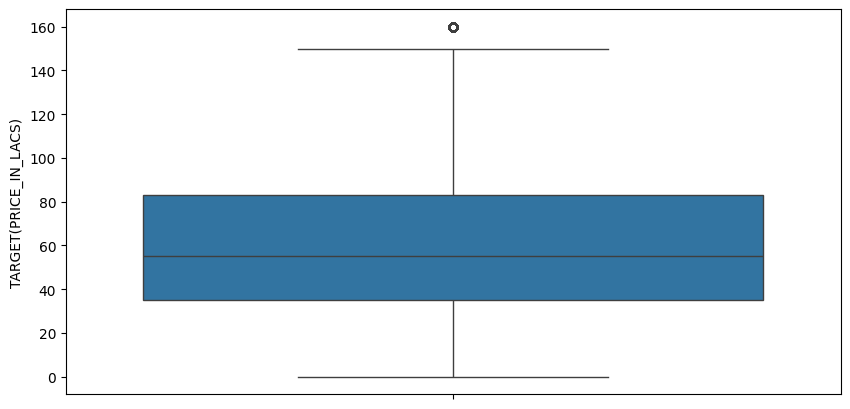

Number of outliers: 407
        TARGET(PRICE_IN_LACS)    SQUARE_FT  ADDRESS_, panvel,Mumbai  \
137521                  160.0  2500.000000                        0   
137605                  160.0  2472.952087                        0   
137655                  160.0  2069.857697                        0   
137659                  160.0  2302.158273                        0   
137669                  160.0  2780.191138                        0   
...                       ...          ...                      ...   
166189                  160.0   980.031851                        0   
166318                  160.0   904.108041                        0   
166453                  160.0   964.727163                        0   
166579                  160.0  1684.033260                        0   
166701                  160.0  2666.666667                        0   

        ADDRESS_,Manoramaganj,Indore  ADDRESS_100 Feet Road,Anand  \
137521                             0                  

In [110]:
# prompt: find outliers of  columns TARGET(PRICE_IN_LACS)

import seaborn as sns

# Create a boxplot of the 'TARGET(PRICE_IN_LACS)' column
sns.boxplot(df['TARGET(PRICE_IN_LACS)'])
plt.show()

# Calculate the interquartile range (IQR)
q1 = df['TARGET(PRICE_IN_LACS)'].quantile(0.25)
q3 = df['TARGET(PRICE_IN_LACS)'].quantile(0.75)
IQR = q3 - q1

# Define the lower and upper bounds for outlier detection
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Find the outliers
outliers = df[(df['TARGET(PRICE_IN_LACS)'] < lower_bound) | (df['TARGET(PRICE_IN_LACS)'] > upper_bound)]

# Print the number of outliers
print(f"Number of outliers: {len(outliers)}")

# Print the outliers
print(outliers)


In [111]:
# prompt: split data into target variable

y = df['TARGET(PRICE_IN_LACS)']
X = df.drop('TARGET(PRICE_IN_LACS)', axis=1)


In [112]:
# prompt: transform x and y standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


In [118]:
X_scaled

array([[-0.01290972, -0.00632177, -0.00632177, ..., -0.00632177,
        -0.00632177, -0.00632177],
       [-0.00657775, -0.00632177, -0.00632177, ..., -0.00632177,
        -0.00632177, -0.00632177],
       [-0.00746473, -0.00632177, -0.00632177, ..., -0.00632177,
        -0.00632177, -0.00632177],
       ...,
       [-0.01633435, -0.00632177, -0.00632177, ..., -0.00632177,
        -0.00632177, -0.00632177],
       [-0.01969308, -0.00632177, -0.00632177, ..., -0.00632177,
        -0.00632177, -0.00632177],
       [-0.0207582 , -0.00632177, -0.00632177, ..., -0.00632177,
        -0.00632177, -0.00632177]])

In [119]:
y_scaled

array([[-1.76195294],
       [-0.20550774],
       [-0.31870376],
       ...,
       [-0.99504994],
       [ 0.1340803 ],
       [-0.97524064]])

In [113]:
# prompt: split data into train test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)


In [114]:
# prompt: apply linear regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [117]:
print(y_test.shape)
print(y_test)

(7507, 1)
[[ 0.75665838]
 [-0.09231173]
 [ 0.02088429]
 ...
 [ 0.36047233]
 [ 0.72835938]
 [-0.06401272]]


In [115]:
# prompt: prediction

y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_pred)


(7507, 1)
[[-3.39355469e-02]
 [ 3.30810547e-01]
 [-1.36401367e+00]
 ...
 [ 2.47876630e+15]
 [ 9.77172852e-01]
 [-6.41804578e+14]]


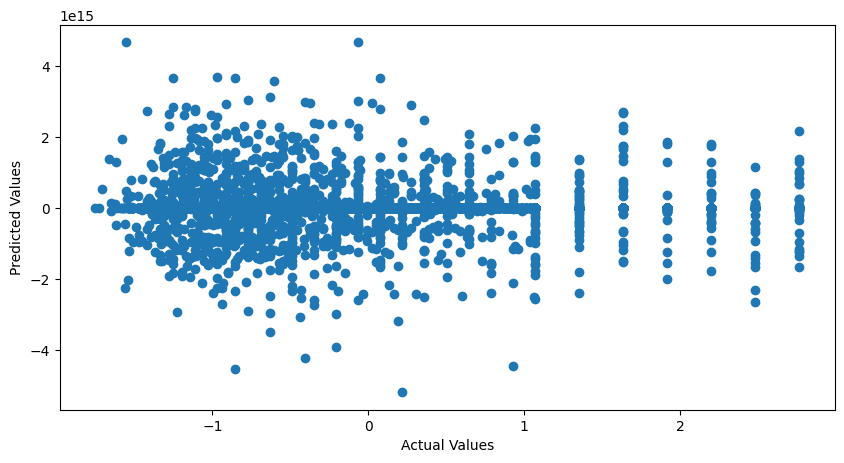

In [116]:
# prompt: scatter plot between y_test and y_pred

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


In [121]:
# prompt:  Combine actual and predicted values side by side

results=np.column_stack((y_test,y_pred))
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")


Streaming output truncated to the last 5000 lines.
          2.77 |          0.30
         -0.55 |         -0.55
          0.08 |          0.57
         -0.35 |         -0.28
         -0.49 |         -0.48
         -0.69 |          0.10
          0.68 |          0.68
          0.25 |         -0.14
          1.63 |          1.54
         -0.04 |          0.09
         -0.06 |  401107621907234.69
          0.87 |          0.67
         -0.73 |         -0.63
         -0.69 |         -1.10
          0.78 |          0.24
          0.08 |  515208933815346.88
          0.36 |         -0.19
          0.36 |          0.32
          1.35 |          1.38
         -0.21 |         -0.65
         -0.81 |          0.04
         -0.81 |         -0.25
         -0.06 |         -0.96
          0.89 |         -0.07
         -1.20 |         -0.52
          0.39 |          0.59
         -0.99 |         -0.67
         -1.42 |  2739441091671910.50
         -1.15 |         -1.09
         -0.40 |         -0.82


In [123]:
# prompt: residual

residual = y_test - y_pred
print(residual)


[[ 7.90593926e-01]
 [-4.23122274e-01]
 [ 1.38489796e+00]
 ...
 [-2.47876630e+15]
 [-2.48813476e-01]
 [ 6.41804578e+14]]


In [124]:
# prompt: find mse and rmse

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)


MSE: 2.2646939197868123e+29
RMSE: 475888003608707.5


In [125]:
# prompt: apply decision tree

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='squared_error', max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)


MSE: 0.7520532761521026
RMSE: 0.8672100530737075


In [126]:
# prompt: random forest

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(criterion='squared_error', max_depth=5, n_estimators=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)


MSE: 0.7402199662763517
RMSE: 0.8603603700057039


In [128]:
# prompt: gradient boosting regression

from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, subsample=0.5, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)


MSE: 0.609470063154658
RMSE: 0.7806856365750929


In [129]:
# prompt: check the ranking of the models

models = [
    {
        "model": "Linear Regression",
        "mse": mean_squared_error(y_test, model.predict(X_test)),
        "rmse": np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    },
    {
        "model": "Decision Tree Regressor",
        "mse": mean_squared_error(y_test, model.predict(X_test)),
        "rmse": np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    },
    {
        "model": "Random Forest Regressor",
        "mse": mean_squared_error(y_test, model.predict(X_test)),
        "rmse": np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    },
    {
        "model": "Gradient Boosting Regressor",
        "mse": mean_squared_error(y_test, model.predict(X_test)),
        "rmse": np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    }
]

models.sort(key=lambda model: model["rmse"])

for model in models:
    print(f"{model['model']:25} MSE: {model['mse']:12.2f} RMSE: {model['rmse']:12.2f}")


Linear Regression         MSE:         0.61 RMSE:         0.78
Decision Tree Regressor   MSE:         0.61 RMSE:         0.78
Random Forest Regressor   MSE:         0.61 RMSE:         0.78
Gradient Boosting Regressor MSE:         0.61 RMSE:         0.78
